# Analysis & Classification of Fetal Heart Rates

### Team 2
- Juan Pablo Díaz López
- Jose Pablo González Flores
- Juan Sebastian Neira González

In [1]:
#Library importation
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv
from plotting import Plotting

In [2]:
#upload data into Dataframe
data= pd.read_excel(os.getenv('CTG'),sheet_name=os.getenv('CTG_sheet'),skiprows=1)

In [3]:
#delete unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

#select important columns, drop raw data
col = ['b','e','AC','FM','UC','DL','DS','DP','DR','NSP', 'A', 'B', 'C' ,'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']
data = data.drop(columns=col)

In [4]:
data.head(5)

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0


In [5]:
data.isna().sum()

LB          3
AC.1        3
FM.1        2
UC.1        2
DL.1        1
DS.1        1
DP.1        1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
dtype: int64

In [6]:
data = data.dropna()

In [7]:
new_names = {'LB': 'bl_FHR', 
             'AC.1': 'accel', 
             'FM.1': 'fetal_mov', 
             'UC.1': 'uterine_contr', 
             'DL.1': 'light_decel', 
             'DS.1': 'severe_decel', 
             'DP.1': 'prolong_decel', 
             'SH':'sh_pattern', 
             'AD':'ad_pattern', 
             'DE':'de_pattern', 
             'LD': 'ld_pattern', 
             'FS': 'fs_pattern', 
             'SUSP': 'sus_pattern'}
data.rename(columns = new_names, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bl_FHR         2126 non-null   float64
 1   accel          2126 non-null   float64
 2   fetal_mov      2126 non-null   float64
 3   uterine_contr  2126 non-null   float64
 4   light_decel    2126 non-null   float64
 5   severe_decel   2126 non-null   float64
 6   prolong_decel  2126 non-null   float64
 7   ASTV           2126 non-null   float64
 8   MSTV           2126 non-null   float64
 9   ALTV           2126 non-null   float64
 10  MLTV           2126 non-null   float64
 11  Width          2126 non-null   float64
 12  Min            2126 non-null   float64
 13  Max            2126 non-null   float64
 14  Nmax           2126 non-null   float64
 15  Nzeros         2126 non-null   float64
 16  Mode           2126 non-null   float64
 17  Mean           2126 non-null   float64
 18  Median       

# EDA

## EDA Univariate

### feature baseline_FHR (Fetal Heart Rate)

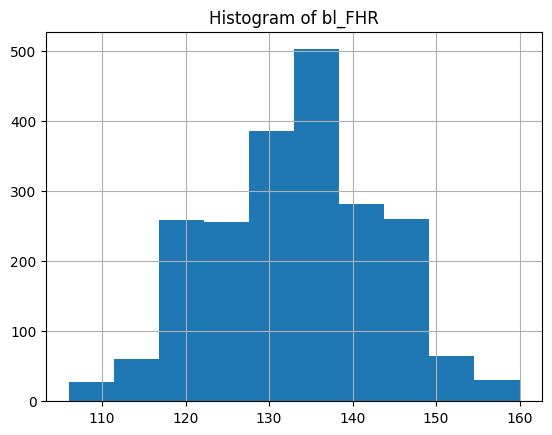

count    2126.000000
mean      133.303857
std         9.840844
min       106.000000
25%       126.000000
50%       133.000000
75%       140.000000
max       160.000000
Name: bl_FHR, dtype: float64

In [9]:
plotter = Plotting(plot_option=1, x='bl_FHR', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 133.3038
- median: 133.0000
- sdt dev: 9.8408

There doesn´t seem to be any outliers in the distribution

### Feature acceleration

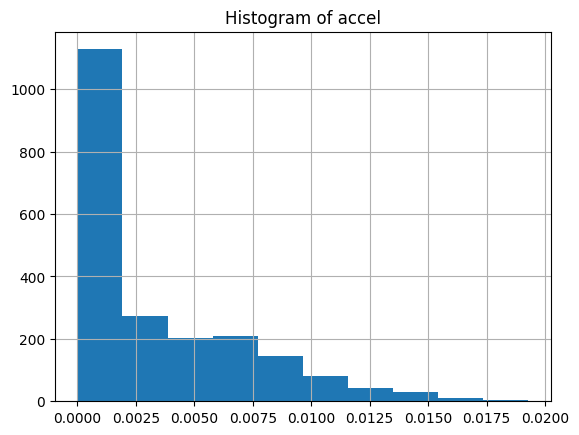

count    2126.000000
mean        0.003170
std         0.003860
min         0.000000
25%         0.000000
50%         0.001630
75%         0.005631
max         0.019284
Name: accel, dtype: float64

In [10]:
plotter = Plotting(plot_option=1, x='accel', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 0.0031
- median: 0.0016
- sdt dev: 0.0038

While there are outlier values that appear in the distribution, they are close enough to take them as part of the main distribution

### Feature fetal movement

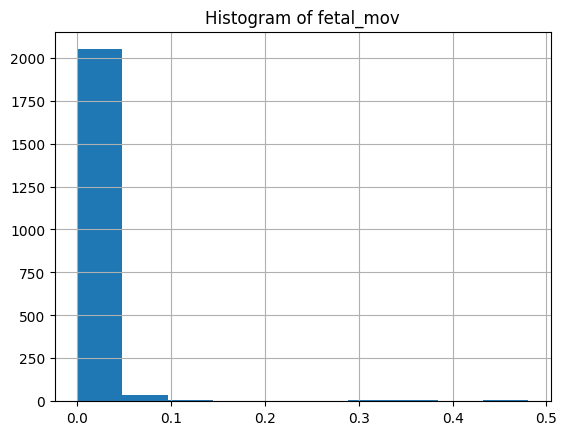

count    2126.000000
mean        0.009474
std         0.046670
min         0.000000
25%         0.000000
50%         0.000000
75%         0.002512
max         0.480634
Name: fetal_mov, dtype: float64

In [11]:
plotter = Plotting(plot_option=1, x='fetal_mov', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 0.0094
- median: 0.0000
- sdt dev: 0.0466
- outlier-rule : >= 0.2

### Feature uterine contractions

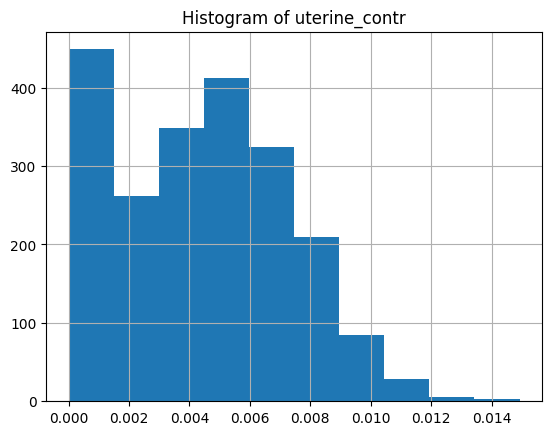

count    2126.000000
mean        0.004357
std         0.002940
min         0.000000
25%         0.001876
50%         0.004482
75%         0.006525
max         0.014925
Name: uterine_contr, dtype: float64

In [12]:
plotter = Plotting(plot_option=1, x='uterine_contr', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 0.0043
- median: 0.0044
- sdt dev: 0.0029

### Feature light decelerations

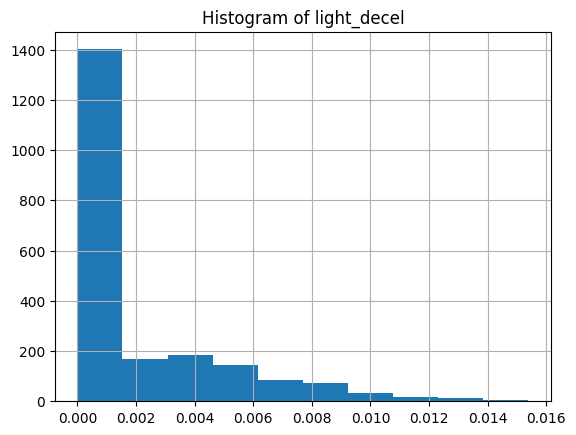

count    2126.000000
mean        0.001885
std         0.002962
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003264
max         0.015385
Name: light_decel, dtype: float64

In [13]:
plotter = Plotting(plot_option=1, x='light_decel', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 0.0018
- median: 0.0000
- sdt dev: 0.0029

### Feature severe decelerations

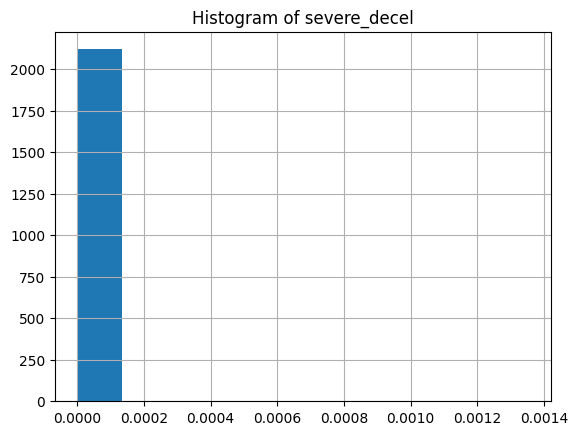

count    2126.000000
mean        0.000004
std         0.000063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001353
Name: severe_decel, dtype: float64

In [14]:
plotter = Plotting(plot_option=1, x='severe_decel', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 0.000004
- median: 0.000000
- sdt dev: 0.000063
- outlier rule: >= 0.0008

### Feature prolonged decelerations

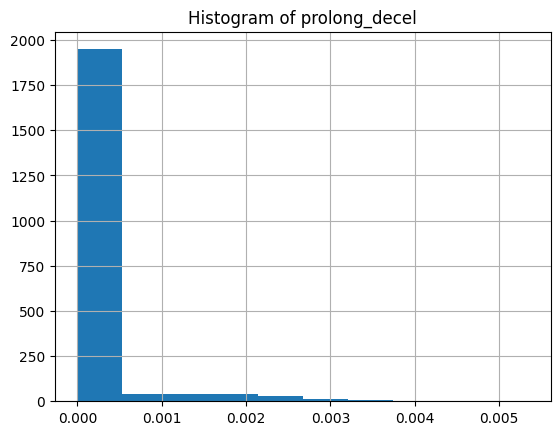

count    2126.000000
mean        0.000157
std         0.000580
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.005348
Name: prolong_decel, dtype: float64

In [15]:
plotter = Plotting(plot_option=1, x='prolong_decel', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 0.000157
- median: 0.000000
- sdt dev: 0.00058
- outlier rule: >= 0.002

### Feature abnormal short term variability (ASTV)

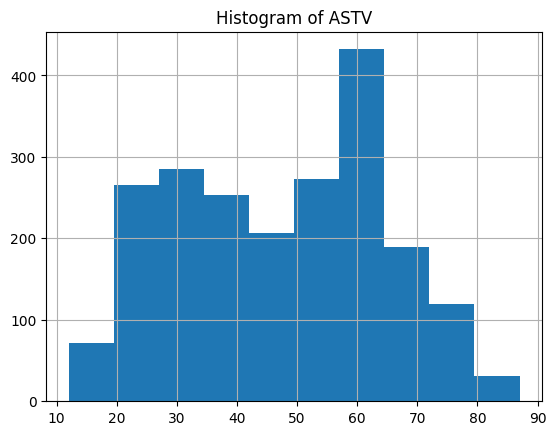

count    2126.000000
mean       46.990122
std        17.192814
min        12.000000
25%        32.000000
50%        49.000000
75%        61.000000
max        87.000000
Name: ASTV, dtype: float64

In [16]:
plotter = Plotting(plot_option=1, x='ASTV', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 46.9901
- median: 49.0000
- sdt dev: 17.1928

### Feature mean value short term variability (MSTV)

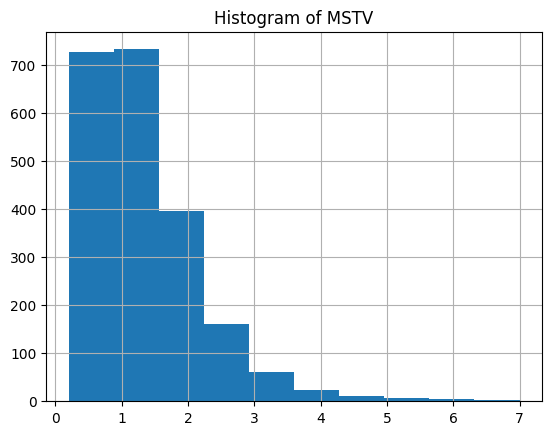

count    2126.000000
mean        1.332785
std         0.883241
min         0.200000
25%         0.700000
50%         1.200000
75%         1.700000
max         7.000000
Name: MSTV, dtype: float64

In [17]:
plotter = Plotting(plot_option=1, x='MSTV', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 1.3327
- median: 1.2000
- sdt dev: 0.8832
- outlier rule: >= 5

### Feature abnormal long term variability (ALTV)

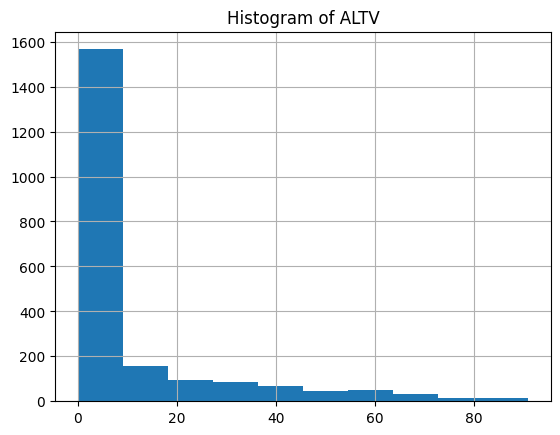

count    2126.00000
mean        9.84666
std        18.39688
min         0.00000
25%         0.00000
50%         0.00000
75%        11.00000
max        91.00000
Name: ALTV, dtype: float64

In [18]:
plotter = Plotting(plot_option=1, x='ALTV', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 9.8466
- median: 0.0000
- sdt dev: 18.3968
- outlier rule: >= 70

### Feature mean value long term variability (MLTV)

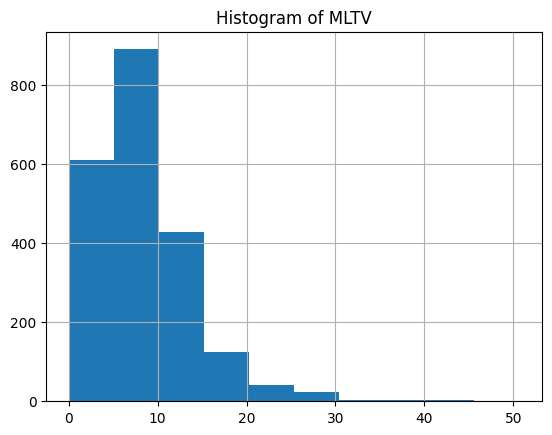

count    2126.000000
mean        8.187629
std         5.628247
min         0.000000
25%         4.600000
50%         7.400000
75%        10.800000
max        50.700000
Name: MLTV, dtype: float64

In [19]:
plotter = Plotting(plot_option=1, x='MLTV', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 8.1876
- median: 7.4000
- sdt dev: 5.6282
- outlier rule: >= 30

### Feature Width

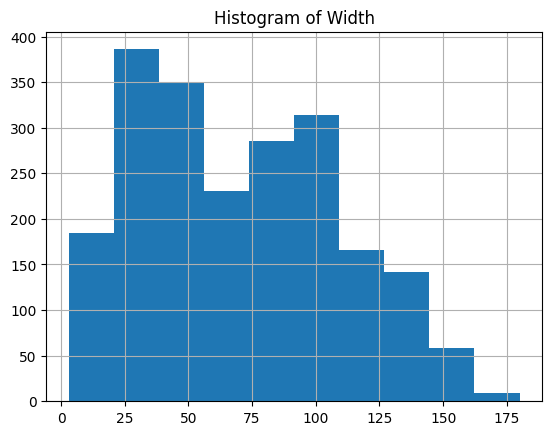

count    2126.000000
mean       70.445908
std        38.955693
min         3.000000
25%        37.000000
50%        67.500000
75%       100.000000
max       180.000000
Name: Width, dtype: float64

In [20]:
plotter = Plotting(plot_option=1, x='Width', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 70.4459
- median: 67.5000
- sdt dev: 38.9557

### Feature min

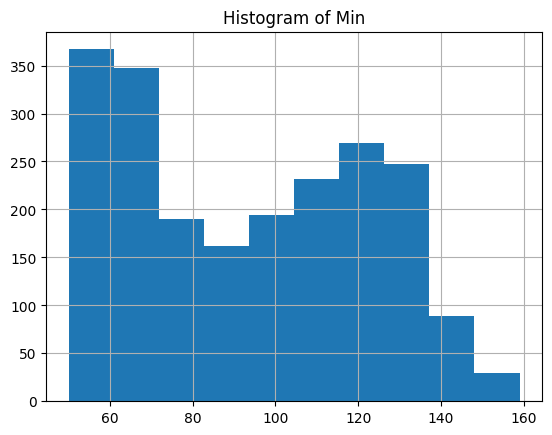

count    2126.000000
mean       93.579492
std        29.560212
min        50.000000
25%        67.000000
50%        93.000000
75%       120.000000
max       159.000000
Name: Min, dtype: float64

In [21]:
plotter = Plotting(plot_option=1, x='Min', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 93.5795
- median: 93.0000
- sdt dev: 29.5602

### Feature max

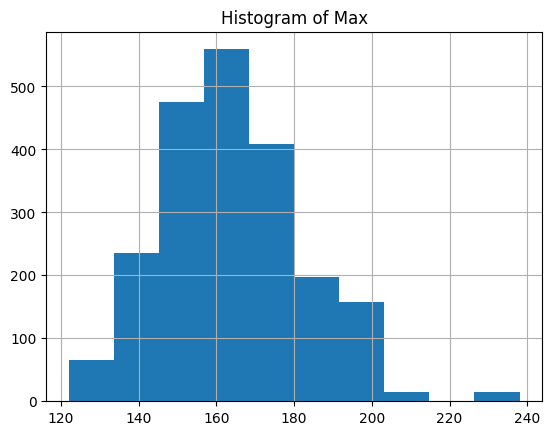

count    2126.000000
mean      164.025400
std        17.944183
min       122.000000
25%       152.000000
50%       162.000000
75%       174.000000
max       238.000000
Name: Max, dtype: float64

In [22]:
plotter = Plotting(plot_option=1, x='Max', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 164.0254
- median: 162.0000
- sdt dev: 17.9441
- outlier rule: >= 220

### Feature Nmax

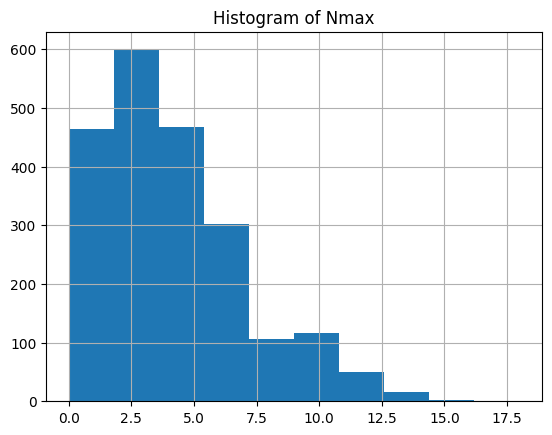

count    2126.000000
mean        4.068203
std         2.949386
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        18.000000
Name: Nmax, dtype: float64

In [23]:
plotter = Plotting(plot_option=1, x='Nmax', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 4.0682
- median: 3.0000
- sdt dev: 2.9494

### Feature Nzeros

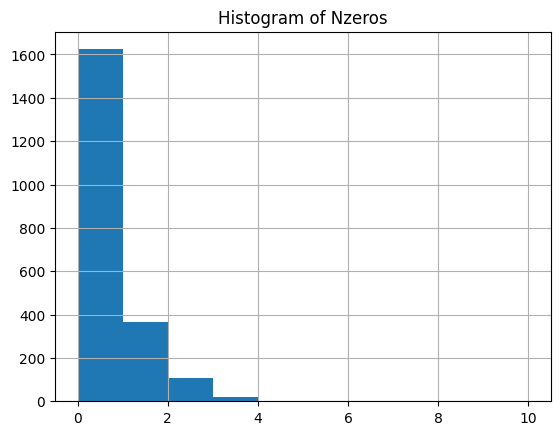

count    2126.000000
mean        0.323612
std         0.706059
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: Nzeros, dtype: float64

In [24]:
plotter = Plotting(plot_option=1, x='Nzeros', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 0.3236
- median: 0.0000
- sdt dev: 0.7060
- outlier rule: >= 6

### Feature Mode

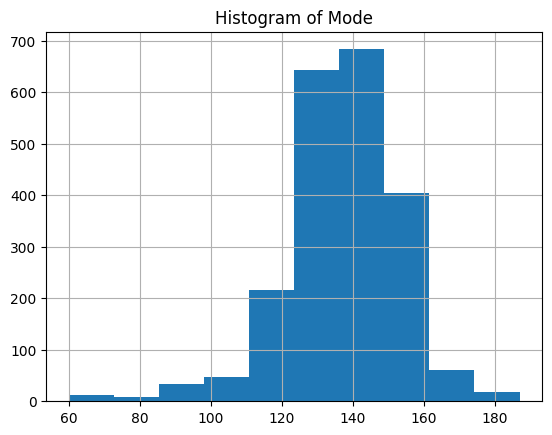

count    2126.000000
mean      137.452023
std        16.381289
min        60.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       187.000000
Name: Mode, dtype: float64

In [25]:
plotter = Plotting(plot_option=1, x='Mode', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 137.4520
- median: 139.0000
- sdt dev: 16.3813
- outlier rule: < 70

### Feature Mean

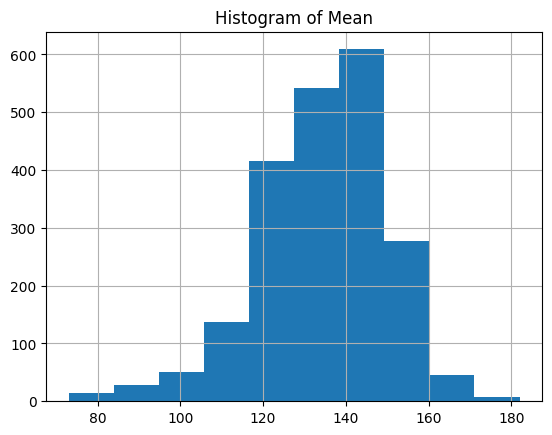

count    2126.000000
mean      134.610536
std        15.593596
min        73.000000
25%       125.000000
50%       136.000000
75%       145.000000
max       182.000000
Name: Mean, dtype: float64

In [26]:
plotter = Plotting(plot_option=1, x='Mean', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 134.6105
- median: 136.0000
- sdt dev: 15.5935

### Feature Median

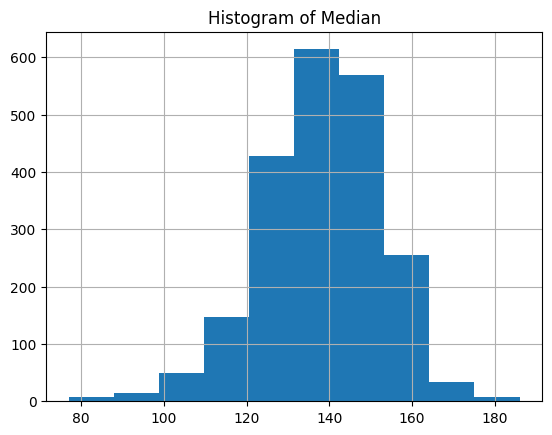

count    2126.000000
mean      138.090310
std        14.466589
min        77.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       186.000000
Name: Median, dtype: float64

In [27]:
plotter = Plotting(plot_option=1, x='Median', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 138.0903
- median: 139.0000
- sdt dev: 14.4666

### Feature Variance

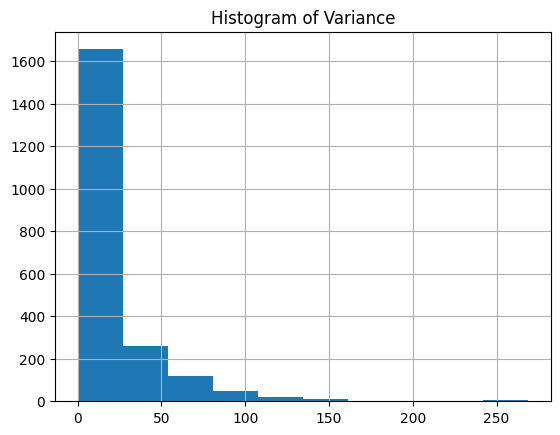

count    2126.000000
mean       18.808090
std        28.977636
min         0.000000
25%         2.000000
50%         7.000000
75%        24.000000
max       269.000000
Name: Variance, dtype: float64

In [28]:
plotter = Plotting(plot_option=1, x='Variance', data=data)
plotter.plot()

#### Conclusion
The main statistics are:
- mean: 18.8081
- median: 7.0000
- sdt dev: 28.9776
- outlier rule: >= 200

### Feature Tendency

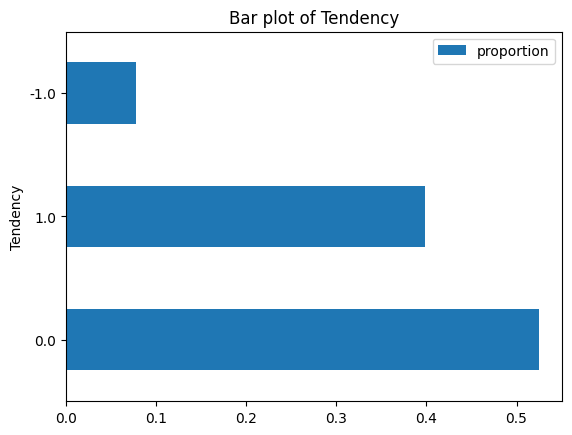

count    2126.000000
mean        0.320320
std         0.610829
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Tendency, dtype: float64

In [29]:
x="Tendency"
pd.DataFrame(data[x].value_counts(normalize=True)).plot.barh()
plt.title("Bar plot of "+x)
plt.show()
data[x].describe()

#### Conclusion
The tendency of the histograms from most of the instances are 0, so they are symmetric, from there, most of the tendencies are positive

### Feature Class

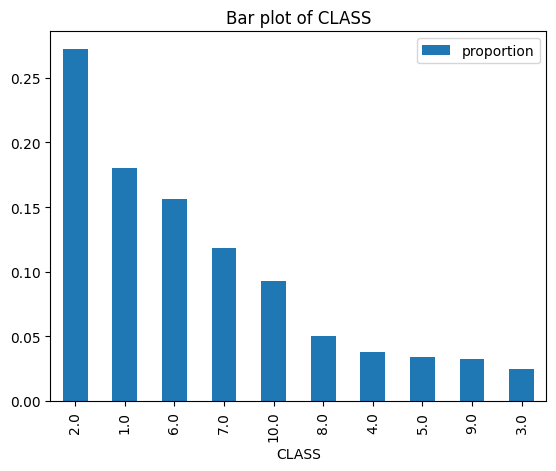

count    2126.000000
mean        4.509878
std         3.026883
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: CLASS, dtype: float64

In [30]:
x="CLASS"
pd.DataFrame(data[x].value_counts(normalize=True)).plot.bar()
plt.title("Bar plot of "+x)
plt.show()
data[x].describe()

#### Conclusion
Over 25% of the entries are categorized as class 2, being the largest of the classifications.
The class with the least entries is 3

## EDA to target variable

### Feature baseline FHR vs Class

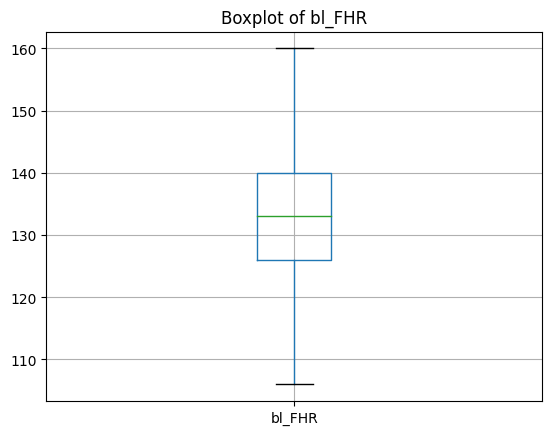

count    2126.000000
mean      133.303857
std         9.840844
min       106.000000
25%       126.000000
50%       133.000000
75%       140.000000
max       160.000000
Name: bl_FHR, dtype: float64

In [31]:
plotter = Plotting(plot_option=2, x='bl_FHR', data=data)
plotter.plot()

In [32]:
data[["bl_FHR","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(2)

,bl_FHR_mean
CLASS,
1.0,132.82
2.0,132.52
3.0,129.43
4.0,133.58
5.0,141.62
6.0,130.32
7.0,132.48
8.0,128.08
9.0,137.06


In [33]:
data[["bl_FHR","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,bl_FHR_median
CLASS,
1.0,133.0
2.0,132.0
3.0,130.0
4.0,131.0
5.0,142.0
6.0,131.5
7.0,132.0
8.0,130.0
9.0,135.0


In [34]:
data[["bl_FHR","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,bl_FHR_std
CLASS,
1.0,10.759973
2.0,10.070386
3.0,7.604425
4.0,9.205792
5.0,6.509879
6.0,7.760095
7.0,8.340574
8.0,6.853069
9.0,10.389310


### Feature acceleration vs Class

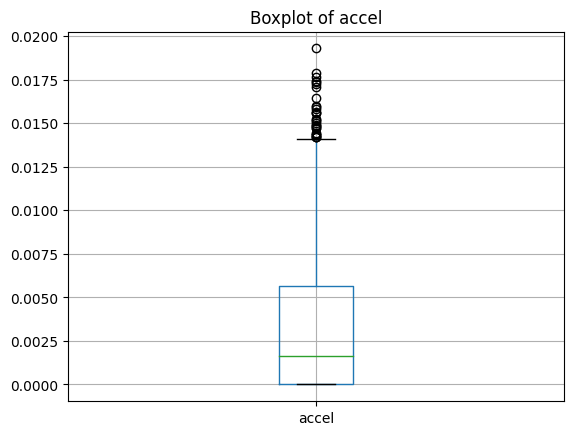

count    2126.000000
mean        0.003170
std         0.003860
min         0.000000
25%         0.000000
50%         0.001630
75%         0.005631
max         0.019284
Name: accel, dtype: float64

In [35]:
plotter = Plotting(plot_option=2, x='accel', data=data)
plotter.plot()

In [36]:
data[["accel","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,accel_mean
CLASS,
1.0,0.0005
2.0,0.0063
3.0,0.0004
4.0,0.0115
5.0,0.0006
6.0,0.0052
7.0,0.0003
8.0,0.0007
9.0,0.0000


In [37]:
data[["accel","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,accel_median
CLASS,
1.0,0.000000
2.0,0.005938
3.0,0.000000
4.0,0.011194
5.0,0.000000
6.0,0.004822
7.0,0.000000
8.0,0.000000
9.0,0.000000


In [38]:
data[["accel","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,accel_std
CLASS,
1.0,0.000860
2.0,0.003235
3.0,0.000861
4.0,0.002960
5.0,0.000923
6.0,0.002771
7.0,0.000693
8.0,0.001258
9.0,0.000000


### Feature fetal movement vs Class

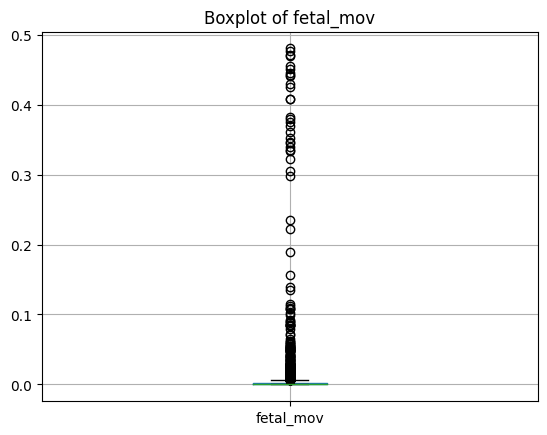

count    2126.000000
mean        0.009474
std         0.046670
min         0.000000
25%         0.000000
50%         0.000000
75%         0.002512
max         0.480634
Name: fetal_mov, dtype: float64

In [39]:
plotter = Plotting(plot_option=2, x='fetal_mov', data=data)
plotter.plot()

In [40]:
data[["fetal_mov","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,fetal_mov_mean
CLASS,
1.0,0.0017
2.0,0.0047
3.0,0.0048
4.0,0.0238
5.0,0.0029
6.0,0.0206
7.0,0.0085
8.0,0.0297
9.0,0.0194


In [41]:
data[["fetal_mov","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,fetal_mov_median
CLASS,
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.013344
5.0,0.000000
6.0,0.000000
7.0,0.000000
8.0,0.000948
9.0,0.000834


In [42]:
data[["fetal_mov","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,fetal_mov_std
CLASS,
1.0,0.005345
2.0,0.017366
3.0,0.015494
4.0,0.029842
5.0,0.006144
6.0,0.084556
7.0,0.046574
8.0,0.093155
9.0,0.073119


### Feature uterine contraction vs Class

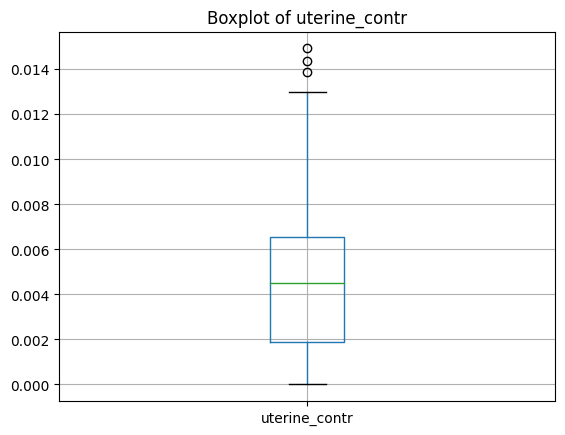

count    2126.000000
mean        0.004357
std         0.002940
min         0.000000
25%         0.001876
50%         0.004482
75%         0.006525
max         0.014925
Name: uterine_contr, dtype: float64

In [43]:
plotter = Plotting(plot_option=2, x='uterine_contr', data=data)
plotter.plot()

In [44]:
data[["uterine_contr","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,uterine_contr_mean
CLASS,
1.0,0.0043
2.0,0.0043
3.0,0.0038
4.0,0.0044
5.0,0.0036
6.0,0.0056
7.0,0.0056
8.0,0.0058
9.0,0.0006


In [45]:
data[["uterine_contr","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,uterine_contr_median
CLASS,
1.0,0.004402
2.0,0.004435
3.0,0.003846
4.0,0.003727
5.0,0.003571
6.0,0.005631
7.0,0.005843
8.0,0.005794
9.0,0.000000


In [46]:
data[["uterine_contr","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,uterine_contr_std
CLASS,
1.0,0.002684
2.0,0.002545
3.0,0.003358
4.0,0.003386
5.0,0.002758
6.0,0.002689
7.0,0.002553
8.0,0.003166
9.0,0.001404


### Feature light deceleration vs Class

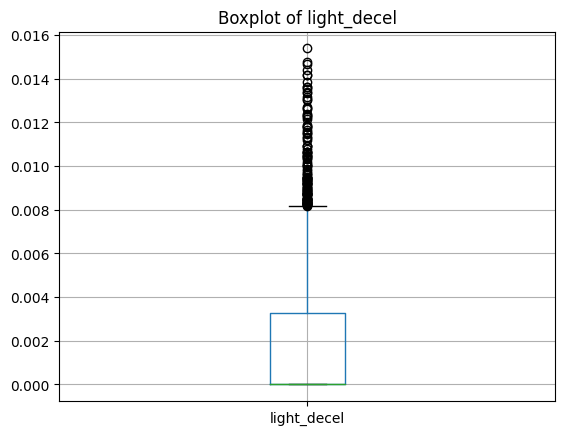

count    2126.000000
mean        0.001885
std         0.002962
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003264
max         0.015385
Name: light_decel, dtype: float64

In [47]:
plotter = Plotting(plot_option=2, x='light_decel', data=data)
plotter.plot()

In [48]:
data[["light_decel","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(6)

,light_decel_mean
CLASS,
1.0,0.000188
2.0,0.000285
3.0,0.000200
4.0,0.000222
5.0,0.000148
6.0,0.004457
7.0,0.006220
8.0,0.006096
9.0,0.000012


In [49]:
data[["light_decel","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,light_decel_median
CLASS,
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.000000
5.0,0.000000
6.0,0.004245
7.0,0.006159
8.0,0.005612
9.0,0.000000


In [50]:
data[["light_decel","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,light_decel_std
CLASS,
1.0,0.000633
2.0,0.000683
3.0,0.000543
4.0,0.000616
5.0,0.000409
6.0,0.002269
7.0,0.002893
8.0,0.003732
9.0,0.000100


### Feature severe deceleration vs Class

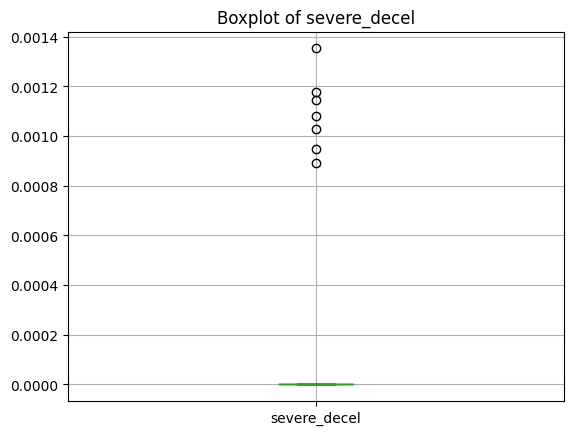

count    2126.000000
mean        0.000004
std         0.000063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001353
Name: severe_decel, dtype: float64

In [51]:
plotter = Plotting(plot_option=2, x='severe_decel', data=data)
plotter.plot()

In [52]:
data[["severe_decel","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(6)

,severe_decel_mean
CLASS,
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.000000
5.0,0.000000
6.0,0.000003
7.0,0.000000
8.0,0.000063
9.0,0.000000


In [53]:
data[["severe_decel","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,severe_decel_median
CLASS,
1.0,0.0
2.0,0.0
3.0,0.0
4.0,0.0
5.0,0.0
6.0,0.0
7.0,0.0
8.0,0.0
9.0,0.0


In [54]:
data[["severe_decel","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,severe_decel_std
CLASS,
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.000000
5.0,0.000000
6.0,0.000049
7.0,0.000000
8.0,0.000261
9.0,0.000000


### Feature prolonged deceleration vs Class

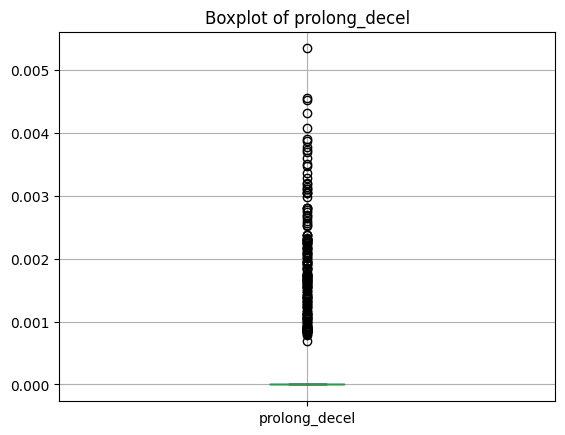

count    2126.000000
mean        0.000157
std         0.000580
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.005348
Name: prolong_decel, dtype: float64

In [55]:
plotter = Plotting(plot_option=2, x='prolong_decel', data=data)
plotter.plot()

In [56]:
data[["prolong_decel","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(6)

,prolong_decel_mean
CLASS,
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.000000
5.0,0.000000
6.0,0.000146
7.0,0.000245
8.0,0.001969
9.0,0.000174


In [57]:
data[["prolong_decel","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,prolong_decel_median
CLASS,
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.000000
5.0,0.000000
6.0,0.000000
7.0,0.000000
8.0,0.002053
9.0,0.000000


In [58]:
data[["prolong_decel","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,prolong_decel_std
CLASS,
1.0,0.000000
2.0,0.000000
3.0,0.000000
4.0,0.000000
5.0,0.000000
6.0,0.000400
7.0,0.000597
8.0,0.001133
9.0,0.000846


### Feature ASTV vs Class

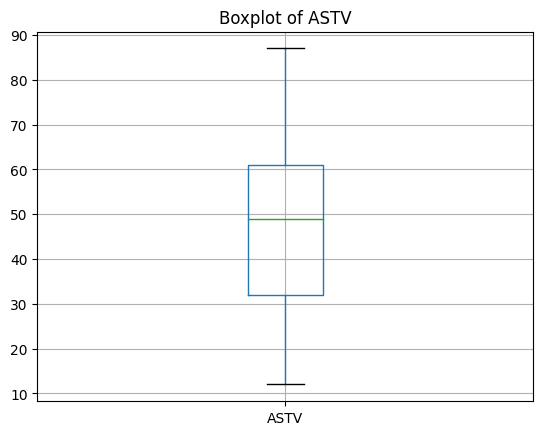

count    2126.000000
mean       46.990122
std        17.192814
min        12.000000
25%        32.000000
50%        49.000000
75%        61.000000
max        87.000000
Name: ASTV, dtype: float64

In [59]:
plotter = Plotting(plot_option=2, x='ASTV', data=data)
plotter.plot()

In [60]:
data[["ASTV","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(2)

,ASTV_mean
CLASS,
1.0,48.68
2.0,43.06
3.0,31.70
4.0,37.17
5.0,53.62
6.0,39.05
7.0,40.79
8.0,57.23
9.0,75.96


In [61]:
data[["ASTV","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,ASTV_median
CLASS,
1.0,50.0
2.0,42.0
3.0,29.0
4.0,36.0
5.0,52.5
6.0,34.0
7.0,34.5
8.0,62.0
9.0,78.0


In [62]:
data[["ASTV","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,ASTV_std
CLASS,
1.0,15.141219
2.0,13.578117
3.0,11.565175
4.0,9.973452
5.0,11.780190
6.0,16.289704
7.0,18.043691
8.0,13.025070
9.0,7.601151


### Feature MSTV vs Class

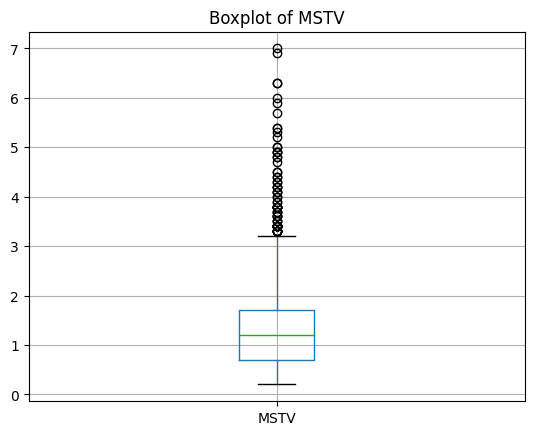

count    2126.000000
mean        1.332785
std         0.883241
min         0.200000
25%         0.700000
50%         1.200000
75%         1.700000
max         7.000000
Name: MSTV, dtype: float64

In [63]:
plotter = Plotting(plot_option=2, x='MSTV', data=data)
plotter.plot()

In [64]:
data[["MSTV","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(2)

,MSTV_mean
CLASS,
1.0,0.88
2.0,1.27
3.0,1.45
4.0,1.76
5.0,0.74
6.0,1.92
7.0,1.96
8.0,2.39
9.0,0.32


In [65]:
data[["MSTV","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,MSTV_median
CLASS,
1.0,0.80
2.0,1.10
3.0,1.30
4.0,1.50
5.0,0.65
6.0,1.70
7.0,1.70
8.0,2.30
9.0,0.30


In [66]:
data[["MSTV","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,MSTV_std
CLASS,
1.0,0.490358
2.0,0.677369
3.0,0.461028
4.0,0.973111
5.0,0.449550
6.0,0.763041
7.0,0.974194
8.0,0.815802
9.0,0.103786


### Feature ALTV vs Class

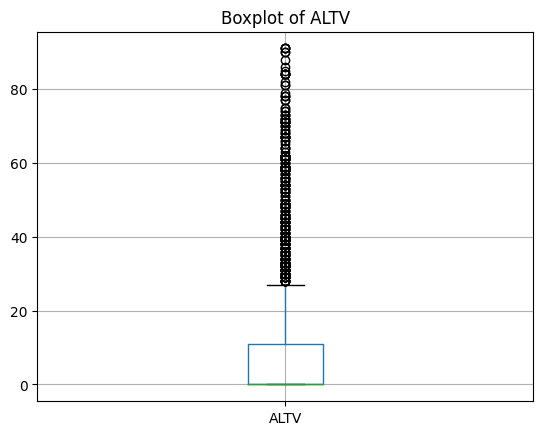

count    2126.00000
mean        9.84666
std        18.39688
min         0.00000
25%         0.00000
50%         0.00000
75%        11.00000
max        91.00000
Name: ALTV, dtype: float64

In [67]:
plotter = Plotting(plot_option=2, x='ALTV', data=data)
plotter.plot()

In [68]:
data[["ALTV","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(2)

,ALTV_mean
CLASS,
1.0,14.99
2.0,2.62
3.0,1.32
4.0,0.00
5.0,17.31
6.0,1.05
7.0,3.95
8.0,0.02
9.0,57.87


In [69]:
data[["ALTV","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,ALTV_median
CLASS,
1.0,7.0
2.0,0.0
3.0,0.0
4.0,0.0
5.0,16.0
6.0,0.0
7.0,0.0
8.0,0.0
9.0,71.0


In [70]:
data[["ALTV","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,ALTV_std
CLASS,
1.0,18.176461
2.0,6.648610
3.0,3.506991
4.0,0.000000
5.0,13.778570
6.0,4.348498
7.0,8.693412
8.0,0.193347
9.0,29.735557


### Feature MLTV vs Class

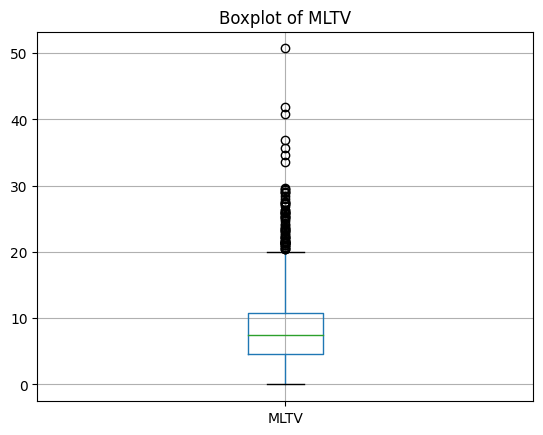

count    2126.000000
mean        8.187629
std         5.628247
min         0.000000
25%         4.600000
50%         7.400000
75%        10.800000
max        50.700000
Name: MLTV, dtype: float64

In [71]:
plotter = Plotting(plot_option=2, x='MLTV', data=data)
plotter.plot()

In [72]:
data[["MLTV","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(2)

,MLTV_mean
CLASS,
1.0,9.28
2.0,9.27
3.0,17.31
4.0,5.53
5.0,9.55
6.0,7.10
7.0,7.84
8.0,2.68
9.0,4.96


In [73]:
data[["MLTV","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,MLTV_median
CLASS,
1.0,9.05
2.0,8.30
3.0,16.10
4.0,4.20
5.0,8.70
6.0,6.30
7.0,6.55
8.0,0.00
9.0,4.00


In [74]:
data[["MLTV","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,MLTV_std
CLASS,
1.0,3.985376
2.0,6.213696
3.0,4.852281
4.0,5.664385
5.0,3.271558
6.0,5.344683
7.0,6.089872
8.0,4.584266
9.0,2.668717


### Feature Width vs Class

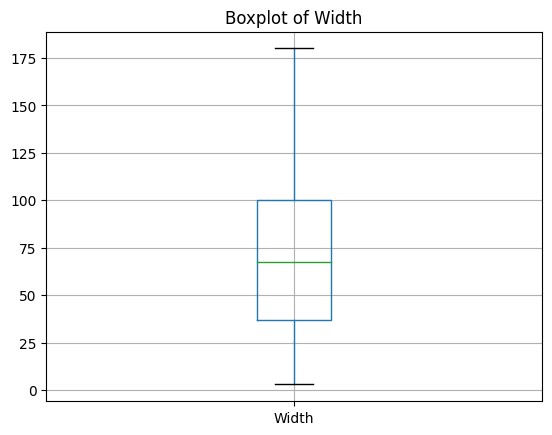

count    2126.000000
mean       70.445908
std        38.955693
min         3.000000
25%        37.000000
50%        67.500000
75%       100.000000
max       180.000000
Name: Width, dtype: float64

In [75]:
plotter = Plotting(plot_option=2, x='Width', data=data)
plotter.plot()

In [76]:
data[["Width","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Width_mean
CLASS,
1.0,40.2656
2.0,69.3092
3.0,60.6038
4.0,97.7531
5.0,52.9861
6.0,102.0090
7.0,96.3532
8.0,113.0935
9.0,24.2899


In [77]:
data[["Width","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Width_median
CLASS,
1.0,32.0
2.0,59.0
3.0,56.0
4.0,109.0
5.0,44.0
6.0,99.5
7.0,94.0
8.0,107.0
9.0,16.0


In [78]:
data[["Width","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Width_std
CLASS,
1.0,25.157203
2.0,31.556553
3.0,25.899465
4.0,35.355880
5.0,30.140279
6.0,25.646032
7.0,29.656974
8.0,23.366858
9.0,22.002073


### Feature Min vs Class

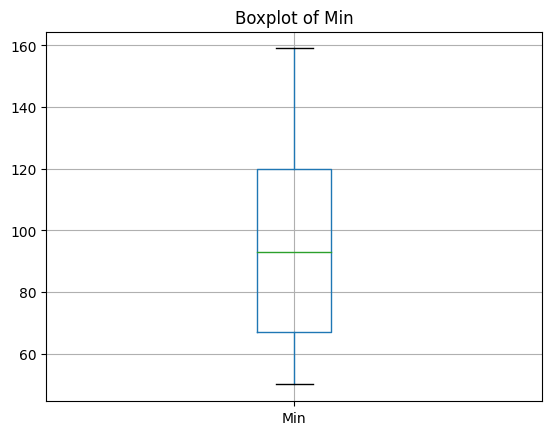

count    2126.000000
mean       93.579492
std        29.560212
min        50.000000
25%        67.000000
50%        93.000000
75%       120.000000
max       159.000000
Name: Min, dtype: float64

In [79]:
plotter = Plotting(plot_option=2, x='Min', data=data)
plotter.plot()

In [80]:
data[["Min","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Min_mean
CLASS,
1.0,111.0651
2.0,97.9568
3.0,93.2453
4.0,85.1605
5.0,116.5972
6.0,72.0904
7.0,67.5952
8.0,59.4393
9.0,121.9710


In [81]:
data[["Min","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Min_median
CLASS,
1.0,115.0
2.0,104.0
3.0,103.0
4.0,76.0
5.0,125.5
6.0,70.0
7.0,65.0
8.0,60.0
9.0,130.0


In [82]:
data[["Min","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Min_std
CLASS,
1.0,21.603076
2.0,26.858785
3.0,20.918253
4.0,32.159158
5.0,26.954662
6.0,14.048394
7.0,14.097655
8.0,7.662919
9.0,22.476112


### Feature Max vs Class

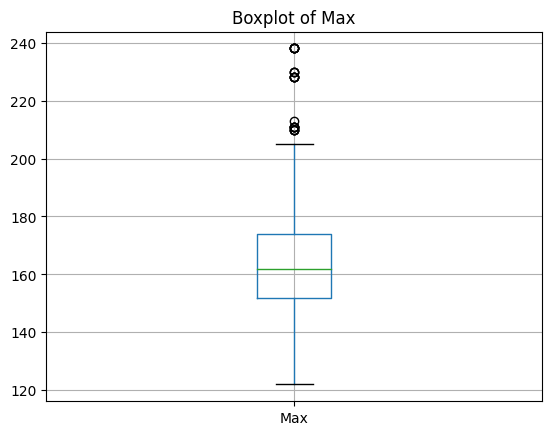

count    2126.000000
mean      164.025400
std        17.944183
min       122.000000
25%       152.000000
50%       162.000000
75%       174.000000
max       238.000000
Name: Max, dtype: float64

In [83]:
plotter = Plotting(plot_option=2, x='Max', data=data)
plotter.plot()

In [84]:
data[["Max","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Max_mean
CLASS,
1.0,151.3307
2.0,167.2660
3.0,153.8491
4.0,182.9136
5.0,169.5833
6.0,174.0994
7.0,163.9484
8.0,172.5327
9.0,146.2609


In [85]:
data[["Max","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Max_median
CLASS,
1.0,151.0
2.0,168.0
3.0,150.0
4.0,183.0
5.0,168.0
6.0,172.0
7.0,159.0
8.0,166.0
9.0,145.0


In [86]:
data[["Median","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Median_std
CLASS,
1.0,11.860282
2.0,11.711794
3.0,7.975379
4.0,10.771490
5.0,7.816246
6.0,11.014381
7.0,11.907167
8.0,11.168378
9.0,11.559992


### Feature Nmax vs Class

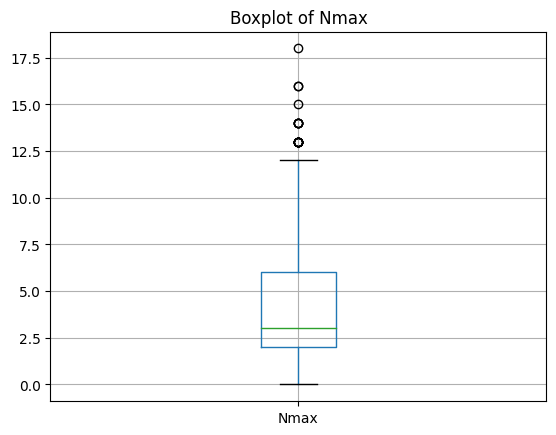

count    2126.000000
mean        4.068203
std         2.949386
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        18.000000
Name: Nmax, dtype: float64

In [87]:
plotter = Plotting(plot_option=2, x='Nmax', data=data)
plotter.plot()

In [88]:
data[["Nmax","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Nmax_mean
CLASS,
1.0,2.2812
2.0,3.8722
3.0,3.8868
4.0,5.7901
5.0,4.0417
6.0,5.6958
7.0,5.7143
8.0,6.4486
9.0,1.3333


In [89]:
data[["Nmax","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Nmax_median
CLASS,
1.0,2.0
2.0,3.0
3.0,3.0
4.0,5.0
5.0,3.0
6.0,5.0
7.0,5.0
8.0,6.0
9.0,1.0


In [90]:
data[["Nmax","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Nmax_std
CLASS,
1.0,1.904800
2.0,2.730876
3.0,2.606651
4.0,3.258512
5.0,2.889698
6.0,2.616629
7.0,2.985642
8.0,2.632287
9.0,1.158938


### Feature Nzeros vs Class

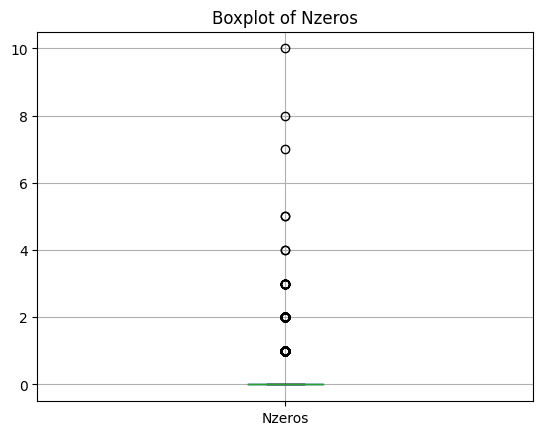

count    2126.000000
mean        0.323612
std         0.706059
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: Nzeros, dtype: float64

In [91]:
plotter = Plotting(plot_option=2, x='Nzeros', data=data)
plotter.plot()

In [92]:
data[["Nzeros","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Nzeros_mean
CLASS,
1.0,0.1641
2.0,0.2435
3.0,0.3585
4.0,0.3580
5.0,0.2361
6.0,0.4367
7.0,0.7698
8.0,0.5701
9.0,0.0000


In [93]:
data[["Nzeros","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Nzeros_median
CLASS,
1.0,0.0
2.0,0.0
3.0,0.0
4.0,0.0
5.0,0.0
6.0,0.0
7.0,0.0
8.0,0.0
9.0,0.0


In [94]:
data[["Nzeros","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Nzeros_std
CLASS,
1.0,0.453199
2.0,0.721234
3.0,0.623092
4.0,0.576815
5.0,0.543672
6.0,0.676921
7.0,1.053643
8.0,0.790416
9.0,0.000000


### Feature Mode vs Class

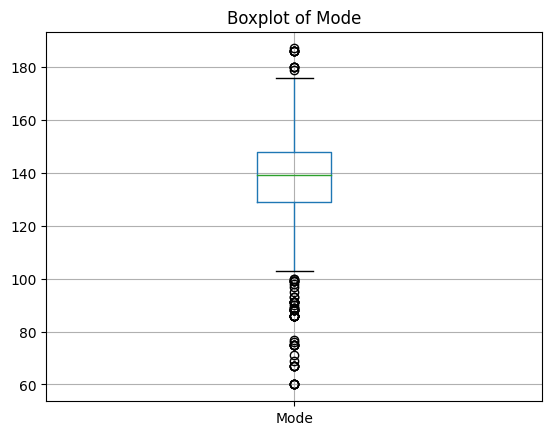

count    2126.000000
mean      137.452023
std        16.381289
min        60.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       187.000000
Name: Mode, dtype: float64

In [95]:
plotter = Plotting(plot_option=2, x='Mode', data=data)
plotter.plot()

In [96]:
data[["Mode","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Mode_mean
CLASS,
1.0,136.5000
2.0,139.8117
3.0,132.4340
4.0,158.4074
5.0,153.8194
6.0,137.3554
7.0,133.1310
8.0,99.8318
9.0,137.2754


In [97]:
data[["Mode","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Mode_median
CLASS,
1.0,136.0
2.0,140.0
3.0,133.0
4.0,157.0
5.0,154.0
6.0,139.0
7.0,133.0
8.0,100.0
9.0,136.0


In [98]:
data[["Mode","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Mode_std
CLASS,
1.0,12.151782
2.0,12.685747
3.0,8.560889
4.0,14.383826
5.0,8.287657
6.0,12.290303
7.0,12.695747
8.0,21.546565
9.0,12.800372


### Feature Mean vs Class

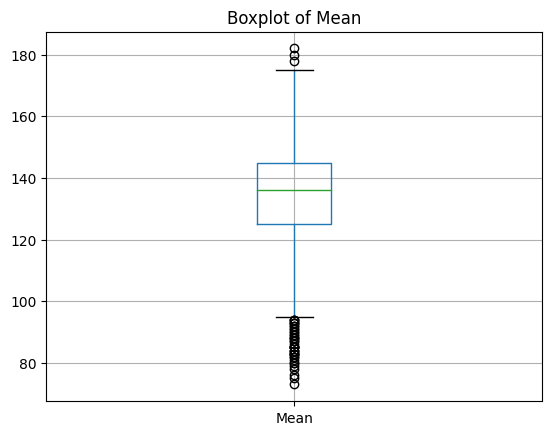

count    2126.000000
mean      134.610536
std        15.593596
min        73.000000
25%       125.000000
50%       136.000000
75%       145.000000
max       182.000000
Name: Mean, dtype: float64

In [99]:
plotter = Plotting(plot_option=2, x='Mean', data=data)
plotter.plot()

In [100]:
data[["Mean","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Mean_mean
CLASS,
1.0,135.2891
2.0,139.6425
3.0,131.3208
4.0,153.5185
5.0,151.4167
6.0,130.5572
7.0,124.7659
8.0,97.0374
9.0,137.7101


In [101]:
data[["Mean","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Mean_median
CLASS,
1.0,135.5
2.0,140.0
3.0,132.0
4.0,151.0
5.0,152.5
6.0,132.0
7.0,124.0
8.0,98.0
9.0,136.0


In [102]:
data[["Mean","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Mean_std
CLASS,
1.0,11.825418
2.0,11.508609
3.0,7.735467
4.0,10.334543
5.0,7.572653
6.0,10.618048
7.0,11.282534
8.0,11.046151
9.0,11.215931


### Feature Median vs Class

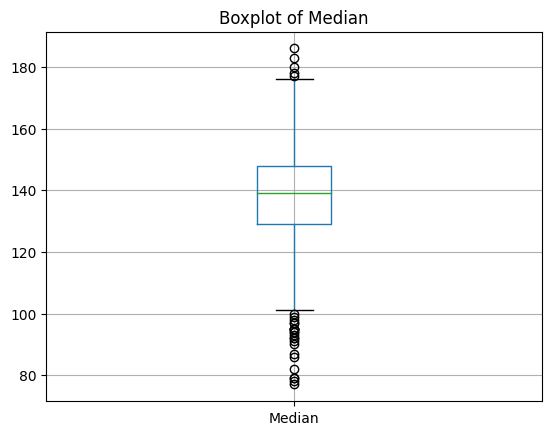

count    2126.000000
mean      138.090310
std        14.466589
min        77.000000
25%       129.000000
50%       139.000000
75%       148.000000
max       186.000000
Name: Median, dtype: float64

In [103]:
plotter = Plotting(plot_option=2, x='Median', data=data)
plotter.plot()

In [104]:
data[["Median","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Median_mean
CLASS,
1.0,137.2786
2.0,141.1554
3.0,133.3208
4.0,156.7778
5.0,153.6806
6.0,136.6837
7.0,131.4841
8.0,106.9439
9.0,138.8841


In [105]:
data[["Median","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Median_median
CLASS,
1.0,137.0
2.0,141.0
3.0,134.0
4.0,155.0
5.0,155.0
6.0,137.0
7.0,131.0
8.0,107.0
9.0,137.0


In [106]:
data[["Median","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Median_std
CLASS,
1.0,11.860282
2.0,11.711794
3.0,7.975379
4.0,10.771490
5.0,7.816246
6.0,11.014381
7.0,11.907167
8.0,11.168378
9.0,11.559992


### Feature Variance vs Class

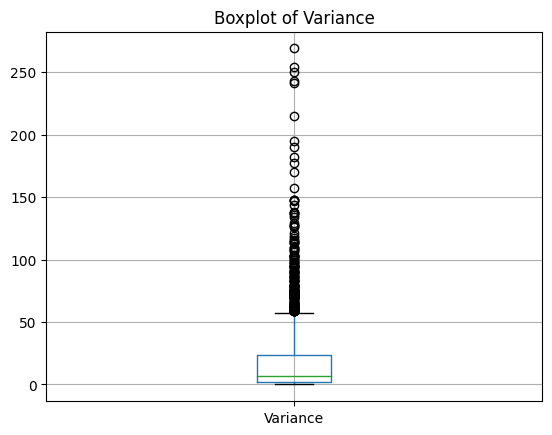

count    2126.000000
mean       18.808090
std        28.977636
min         0.000000
25%         2.000000
50%         7.000000
75%        24.000000
max       269.000000
Name: Variance, dtype: float64

In [107]:
plotter = Plotting(plot_option=2, x='Variance', data=data)
plotter.plot()

In [108]:
data[["Variance","CLASS"]].groupby("CLASS").mean().add_suffix("_mean").round(4)

,Variance_mean
CLASS,
1.0,2.0729
2.0,9.9914
3.0,4.9245
4.0,34.8889
5.0,4.8611
6.0,37.6837
7.0,32.6508
8.0,82.1776
9.0,3.0290


In [109]:
data[["Variance","CLASS"]].groupby("CLASS").median().add_suffix("_median")

,Variance_median
CLASS,
1.0,1.0
2.0,7.0
3.0,4.0
4.0,26.0
5.0,4.0
6.0,31.5
7.0,25.0
8.0,71.0
9.0,0.0


In [110]:
data[["Variance","CLASS"]].groupby("CLASS").std().add_suffix("_std")

,Variance_std
CLASS,
1.0,2.240127
2.0,12.302344
3.0,2.947287
4.0,32.253682
5.0,3.420343
6.0,25.328882
7.0,24.254237
8.0,58.966542
9.0,11.384937


## Correlations

In [111]:
data2 = data[['bl_FHR','accel','fetal_mov','uterine_contr','light_decel','severe_decel','prolong_decel','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance']]

In [112]:
corr_=data2.corr()
corr_.style.background_gradient(cmap='coolwarm').format(precision=4)

,bl_FHR,accel,fetal_mov,uterine_contr,light_decel,severe_decel,prolong_decel,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
bl_FHR,1.0000,-0.0809,-0.0334,-0.1464,-0.1588,-0.0548,-0.1052,0.3056,-0.2796,0.2856,-0.0321,-0.1477,0.3616,0.2751,-0.1139,-0.0047,0.7090,0.7231,0.7892,-0.1339
accel,-0.0809,1.0000,0.0469,0.0867,-0.1109,-0.0437,-0.1310,-0.2801,0.2076,-0.3743,-0.1449,0.2989,-0.1549,0.3937,0.1893,-0.0064,0.2438,0.2705,0.2729,0.1264
fetal_mov,-0.0334,0.0469,1.0000,-0.0700,0.0504,-0.0108,0.2656,-0.1037,0.1212,-0.0742,0.0111,0.1627,-0.1539,0.0996,0.1645,-0.0179,-0.0610,-0.0895,-0.0722,0.1793
uterine_contr,-0.1464,0.0867,-0.0700,1.0000,0.2870,0.0068,0.0879,-0.2291,0.2869,-0.3080,-0.0685,0.1402,-0.1119,0.1202,0.0819,0.0578,-0.1066,-0.1903,-0.1421,0.2388
light_decel,-0.1588,-0.1109,0.0504,0.2870,1.0000,0.1152,0.2311,-0.1174,0.5633,-0.2723,-0.2432,0.5203,-0.5539,0.2170,0.3972,0.2353,-0.3502,-0.5306,-0.3908,0.5675
severe_decel,-0.0548,-0.0437,-0.0108,0.0068,0.1152,1.0000,0.0098,0.0373,0.0346,-0.0305,-0.0418,0.0444,-0.0717,-0.0216,0.0069,0.0495,-0.2164,-0.1622,-0.1650,0.1330
prolong_decel,-0.1052,-0.1310,0.2656,0.0879,0.2311,0.0098,1.0000,0.0488,0.2687,-0.1385,-0.2267,0.2665,-0.2783,0.1200,0.2211,0.0573,-0.4371,-0.4923,-0.4483,0.5050
ASTV,0.3056,-0.2801,-0.1037,-0.2291,-0.1174,0.0373,0.0488,1.0000,-0.4307,0.4594,-0.3151,-0.2605,0.2754,-0.1118,-0.1676,-0.1493,0.0584,0.0746,0.1200,-0.1464
MSTV,-0.2796,0.2076,0.1212,0.2869,0.5633,0.0346,0.2687,-0.4307,1.0000,-0.4703,0.0739,0.6608,-0.6226,0.4091,0.5014,0.2662,-0.3076,-0.4454,-0.3361,0.5559
ALTV,0.2856,-0.3743,-0.0742,-0.3080,-0.2723,-0.0305,-0.1385,0.4594,-0.4703,1.0000,-0.1711,-0.4513,0.4228,-0.2832,-0.2793,-0.1218,0.1652,0.2223,0.1865,-0.2815


In [113]:
## Only to show plots for possible pairings
## No need to run this cell again, 
#sns.pairplot(data2)

# Feature Engineering

We are going to evaluate what is the best method for handling outliers on our Data Frame. Dropping them or Capping them.

## Handling Outliers (Dropping)

In [114]:
#We copy the dataframe to drop outliers
data2 = data.copy()
data2

,bl_FHR,accel,fetal_mov,uterine_contr,light_decel,severe_decel,prolong_decel,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0
3,134.0,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0
4,132.0,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0
2122,140.0,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0


In [115]:
#Creating a list of the columns' names that have outliers
col_outliers = ['fetal_mov', 'severe_decel', 'prolong_decel', 'MSTV', 'ALTV', 'MLTV', 'Max', 'Nzeros', 'Variance']

In [116]:
for i in col_outliers:
    factor = 3
    upper_lim = data2[i].mean () + data2[i].std () * factor
    lower_lim = data2[i].mean () - data2[i].std () * factor
    data_outliers = data2[(data2[i] < upper_lim) & (data2[i] > lower_lim)]

In [117]:
data_outliers[col_outliers].describe() #Here we can see the columns that have been modified (the ones with outliers)

,fetal_mov,severe_decel,prolong_decel,MSTV,ALTV,MLTV,Max,Nzeros,Variance
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000
mean,0.008866,0.000003,0.000124,1.306196,10.054755,8.283670,163.506244,0.317963,16.066763
std,0.044821,0.000060,0.000500,0.855013,18.533964,5.593432,17.642458,0.698563,21.254004
min,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,122.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.700000,0.000000,4.700000,152.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.200000,0.000000,7.500000,161.000000,0.000000,7.000000
75%,0.002502,0.000000,0.000000,1.700000,11.000000,10.900000,174.000000,0.000000,22.000000
max,0.480634,0.001353,0.005348,7.000000,91.000000,50.700000,238.000000,10.000000,104.000000


In [118]:
data[col_outliers].describe() #We display the orginial to compare them

,fetal_mov,severe_decel,prolong_decel,MSTV,ALTV,MLTV,Max,Nzeros,Variance
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000
mean,0.009474,0.000004,0.000157,1.332785,9.84666,8.187629,164.025400,0.323612,18.808090
std,0.046670,0.000063,0.000580,0.883241,18.39688,5.628247,17.944183,0.706059,28.977636
min,0.000000,0.000000,0.000000,0.200000,0.00000,0.000000,122.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.700000,0.00000,4.600000,152.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.200000,0.00000,7.400000,162.000000,0.000000,7.000000
75%,0.002512,0.000000,0.000000,1.700000,11.00000,10.800000,174.000000,0.000000,24.000000
max,0.480634,0.001353,0.005348,7.000000,91.00000,50.700000,238.000000,10.000000,269.000000


In [119]:
pd.set_option('display.max_columns', 500) #We increase the display for the columns

In [120]:
data_outliers.describe()  #Here we can see all the columns on the data frame where the outliers have been dropped

,bl_FHR,accel,fetal_mov,uterine_contr,light_decel,severe_decel,prolong_decel,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000
mean,133.357829,0.003170,0.008866,0.004321,0.001812,0.000003,0.000124,47.056196,1.306196,10.054755,8.283670,69.205572,94.300672,163.506244,4.003362,0.317963,138.026897,135.088857,138.465898,16.066763,0.331412,4.456292
std,9.895184,0.003861,0.044821,0.002916,0.002900,0.000060,0.000500,17.204545,0.855013,18.533964,5.593432,38.298983,29.401133,17.642458,2.914691,0.698563,15.041868,15.044138,14.084322,21.254004,0.603261,3.027546
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,67.000000,76.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001826,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.700000,36.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000
50%,133.000000,0.001643,0.000000,0.004475,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,66.000000,95.000000,161.000000,3.000000,0.000000,139.000000,136.000000,140.000000,7.000000,0.000000,4.000000
75%,141.000000,0.005643,0.002502,0.006491,0.003127,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,98.000000,120.000000,174.000000,6.000000,0.000000,148.000000,146.000000,148.000000,22.000000,1.000000,7.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,186.000000,182.000000,186.000000,104.000000,1.000000,10.000000


In [121]:
data.describe() #Here we can see all the columns on the original data frame

,bl_FHR,accel,fetal_mov,uterine_contr,light_decel,severe_decel,prolong_decel,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000


As we can see above, the stadisitc analysis of the columns, changes just a little bit compared to the original one.

## Handling Outliers (Capping)

In [122]:
data_cap = data.copy() #We copy the dataframe to cap the outliers
data_cap

,bl_FHR,accel,fetal_mov,uterine_contr,light_decel,severe_decel,prolong_decel,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0
3,134.0,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0
4,132.0,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5.0
2122,140.0,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5.0
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,5.0
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5.0


In [123]:
#Capping the outlier rows with Percentiles
for i in col_outliers:
    upper_lim = data_cap[i].quantile(.95)
    lower_lim = data_cap[i].quantile(.05) 
    data_cap.loc[(data_cap[i] > upper_lim),i] = upper_lim 
    data_cap.loc[(data_cap[i] < lower_lim),i] = lower_lim

In [124]:
data_cap.describe()  #Here we can see all the columns on the data frame where the outliers have been capped

,bl_FHR,accel,fetal_mov,uterine_contr,light_decel,severe_decel,prolong_decel,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.003412,0.004357,0.001885,0.0,0.000113,46.990122,1.293697,9.205550,7.934113,70.445908,93.579492,163.976482,4.068203,0.300094,137.452023,134.610536,138.090310,16.928504,0.320320,4.509878
std,9.840844,0.003860,0.007263,0.002940,0.002962,0.0,0.000383,17.192814,0.748324,16.302424,4.864248,38.955693,29.560212,16.502988,2.949386,0.581495,16.381289,15.593596,14.466589,21.531297,0.610829,3.026883
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,0.300000,0.000000,0.000000,3.000000,50.000000,138.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.0,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.0,0.000000,49.000000,1.200000,0.000000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.0,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000
max,160.000000,0.019284,0.028289,0.014925,0.015385,0.0,0.001539,87.000000,3.000000,56.000000,18.475000,180.000000,159.000000,198.000000,18.000000,2.000000,187.000000,182.000000,186.000000,76.000000,1.000000,10.000000


In [125]:
data.describe() #Here we can see all the columns on the original data frame

,bl_FHR,accel,fetal_mov,uterine_contr,light_decel,severe_decel,prolong_decel,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000


As we can see above, in the columns where the outliers existed, there's a bigger difference compared to the orignal
data frame.

We are opting for the use of dropping outliers because the changes in values only happens to the columns where outliers existed, leaving behind the other columns. This might have an impact on columns where relations existed. 

For example fetal_movement is usually associated with increases on the FHR, which are the accelerations. Fetal movement's mean value changes in the table where outliers are capped, but the mean of accelerations stays the same.

## Scaling (Normalization)

In [126]:
mmscaler = MinMaxScaler()

data_norm = data.copy()

In [127]:
data_norm[col_outliers] = mmscaler.fit_transform(data_norm[col_outliers])

In [128]:
data_norm[col_outliers].describe()

,fetal_mov,severe_decel,prolong_decel,MSTV,ALTV,MLTV,Max,Nzeros,Variance
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,0.019711,0.002649,0.029279,0.166586,0.108205,0.161492,0.362288,0.032361,0.069919
std,0.097101,0.046501,0.108403,0.129888,0.202164,0.111011,0.154691,0.070606,0.107724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.073529,0.000000,0.090730,0.258621,0.000000,0.007435
50%,0.000000,0.000000,0.000000,0.147059,0.000000,0.145957,0.344828,0.000000,0.026022
75%,0.005227,0.000000,0.000000,0.220588,0.120879,0.213018,0.448276,0.000000,0.089219
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scaling (Standarization)

In [129]:
sc = StandardScaler()

data_stand = data.copy()

In [130]:
data_stand[col_outliers] = sc.fit_transform(data_stand[col_outliers])

In [131]:
data_stand[col_outliers].describe()

,fetal_mov,severe_decel,prolong_decel,MSTV,ALTV,MLTV,Max,Nzeros,Variance
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,1.336863e-17,-3.007942e-17,-4.010589e-17,6.684315e-17,-5.347452e-17,2.406354e-16,-1.203177e-16,2.757280e-17,-5.347452e-17
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.030479e-01,-5.698237e-02,-2.701570e-01,-1.282833e+00,-5.353613e-01,-1.455081e+00,-2.342558e+00,-4.584438e-01,-6.492081e-01
25%,-2.030479e-01,-5.698237e-02,-2.701570e-01,-7.166031e-01,-5.353613e-01,-6.375828e-01,-6.703135e-01,-4.584438e-01,-5.801731e-01
50%,-2.030479e-01,-5.698237e-02,-2.701570e-01,-1.503732e-01,-5.353613e-01,-1.399751e-01,-1.128988e-01,-4.584438e-01,-4.075856e-01
75%,-1.492036e-01,-5.698237e-02,-2.701570e-01,4.158567e-01,6.270688e-02,4.642628e-01,5.559989e-01,-4.584438e-01,1.792117e-01
max,1.009797e+01,2.145309e+01,8.956824e+00,6.417893e+00,4.412293e+00,7.555172e+00,4.123453e+00,1.370800e+01,8.635997e+00


# Algorithm

We'll be using Random Forest Classifier for our algorithm and see the results of the three dataframes with different feature engineering techniques applied.

In [132]:
#Capped Outliers

#CLASS as target value
X=data_cap.drop(["CLASS"],axis=1).copy()
y=data_cap["CLASS"]

In [133]:
#splitting into train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [135]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [136]:
y_pred = rf.predict(X_test)

In [137]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8732394366197183
Confusion Matrix:
[[ 62   1   3   0   1   1   3   0   0   2]
 [  3 105   0   0   0   5   1   0   0   0]
 [  2   1  10   0   0   0   0   0   0   0]
 [  0   7   0  12   0   0   0   0   0   0]
 [  1   4   0   0   9   0   0   0   0   3]
 [  0   1   0   0   0  61   1   0   0   0]
 [  0   0   0   0   0   3  49   2   0   0]
 [  0   0   0   0   0   0   1  15   0   0]
 [  0   0   0   0   0   0   0   0  11   1]
 [  3   1   0   0   0   0   1   0   2  38]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.87      0.85      0.86        73
         2.0       0.88      0.92      0.90       114
         3.0       0.77      0.77      0.77        13
         4.0       1.00      0.63      0.77        19
         5.0       0.90      0.53      0.67        17
         6.0       0.87      0.97      0.92        63
         7.0       0.88      0.91      0.89        54
         8.0       0.88      0.94      0.91        16
         9.0

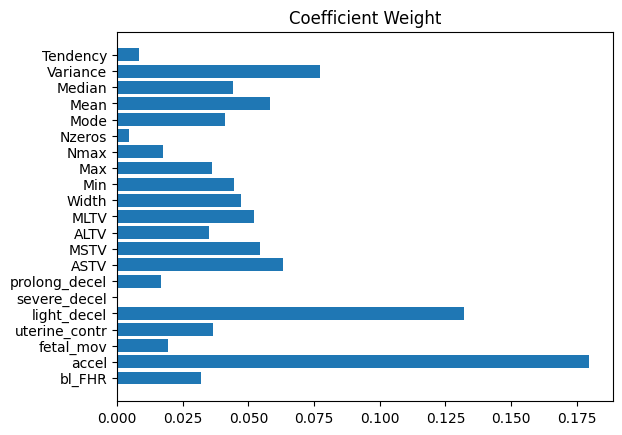

In [138]:
plt.barh(list(X.columns),list(rf.feature_importances_))
plt.title("Coefficient Weight")
plt.show()

In [139]:
#Normalized Scaling

#CLASS as target value
X=data_norm.drop(["CLASS"],axis=1).copy()
y=data_norm["CLASS"]

In [140]:
#splitting into train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [142]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
y_pred = rf.predict(X_test)

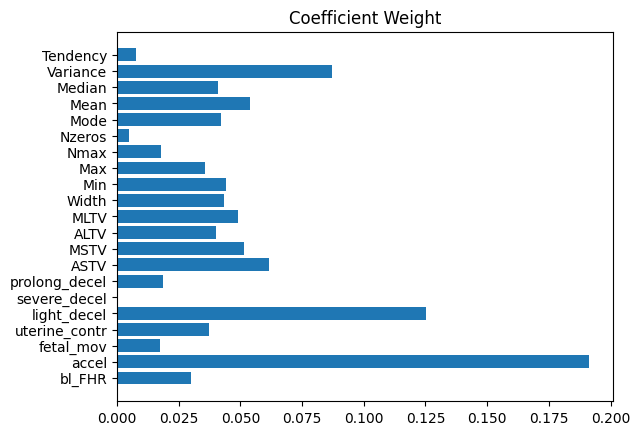

In [144]:
plt.barh(list(X.columns),list(rf.feature_importances_))
plt.title("Coefficient Weight")
plt.show()

In [145]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8755868544600939


In [146]:
#Standardized Scaling

#CLASS as target value
X=data_stand.drop(["CLASS"],axis=1).copy()
y=data_stand["CLASS"]

In [147]:
#splitting into train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [149]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
y_pred = rf.predict(X_test)

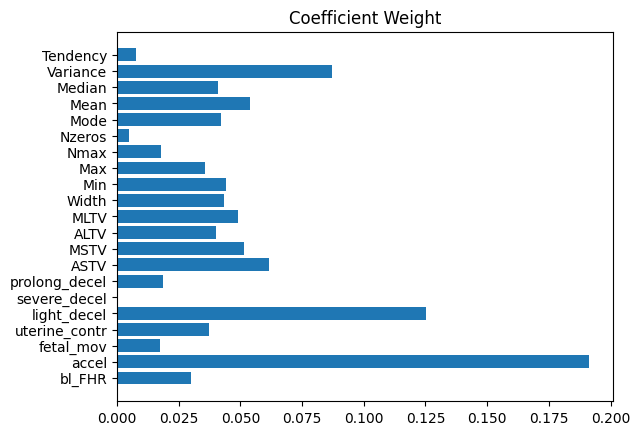

In [151]:
plt.barh(list(X.columns),list(rf.feature_importances_))
plt.title("Coefficient Weight")
plt.show()

In [152]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8755868544600939


Overall, the three methods have the same results which means that each one can give coherent and satisfactory results. 
Also, we noticed that the columns with the most weight are the "sleep" and "pattern" related ones as well as accel, while most of them stay much lighter.